In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.utils import shuffle

In [28]:
librosa_df = pd.read_pickle("TRAINING_ML/LIBROSA_FEATURES.pkl")
librosa_df

,file,label,split,rms_mean_1,rms_std_1,zcr_mean_1,zcr_std_1,mfcc_mean_1,mfcc_std_1,mfcc_mean_2,...,tonnetz_mean_2,tonnetz_std_2,tonnetz_mean_3,tonnetz_std_3,tonnetz_mean_4,tonnetz_std_4,tonnetz_mean_5,tonnetz_std_5,tonnetz_mean_6,tonnetz_std_6
0,EMOITA/data/1613671614352.wav,anger,train,0.024803,0.018837,0.094025,0.041726,-386.987579,109.523575,92.180084,...,-0.000301,0.162367,-0.027398,0.170889,-0.027288,0.276434,0.049214,0.057863,0.035949,0.069892
1,EMOITA/data/1613658275427.wav,anger,train,0.098870,0.089459,0.236770,0.135869,-222.974136,138.506271,36.672932,...,0.006156,0.097414,0.011117,0.142223,0.002411,0.168923,0.012504,0.056174,-0.006190,0.045487
2,EMOITA/data/1613324357435.wav,anger,train,0.061353,0.076801,0.186284,0.138848,-334.634979,163.107941,46.877239,...,-0.026362,0.115640,0.036014,0.208363,-0.084484,0.179091,-0.034872,0.057218,-0.022433,0.060650
3,EMOITA/data/1614274086698.wav,anger,train,0.052951,0.055620,0.110824,0.083089,-337.719818,111.294464,59.848953,...,0.037641,0.121842,-0.049022,0.195470,0.020855,0.160576,-0.014241,0.067783,-0.028701,0.060781
4,EMOITA/data/1612982146424.wav,anger,train,0.029244,0.029896,0.227802,0.121835,-348.929504,174.111023,55.746693,...,-0.000657,0.043193,0.012547,0.135329,0.029270,0.073095,0.026593,0.035770,0.049189,0.038273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10673,TESS/data/OAF_cab_neutral.wav,neutral,train,0.011656,0.006050,0.099544,0.111094,-473.686096,104.024330,64.592720,...,0.057049,0.242782,0.269023,0.240616,-0.191205,0.226487,0.110749,0.083580,-0.006572,0.107392
10674,TESS/data/OAF_chain_disgust.wav,disgust,train,0.011848,0.010605,0.154508,0.182570,-458.265991,133.222198,64.057930,...,-0.008685,0.104257,-0.057601,0.151587,0.003219,0.162539,0.012875,0.046664,0.006841,0.055044
10675,TESS/data/OAF_jar_neutral.wav,neutral,train,0.012574,0.005751,0.102967,0.107745,-495.947906,89.606804,82.702103,...,-0.118085,0.335404,0.128877,0.280124,-0.300117,0.251332,0.103346,0.093092,0.046550,0.116739
10676,TESS/data/OAF_lot_angry.wav,anger,train,0.038752,0.028055,0.110754,0.108246,-377.398712,78.184418,52.664715,...,0.071702,0.153994,-0.003404,0.254154,-0.233565,0.279082,-0.071062,0.094332,-0.015076,0.110328


In [29]:
opensmile_df = pd.read_pickle("TRAINING_ML/OPENSMILE_FEATURES.pkl")
opensmile_df

,file,label,split,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,EMOITA/data/1613671614352.wav,anger,train,38.082653,0.070298,36.122330,39.153728,39.698322,3.575993,13.681193,...,0.043457,0.024475,0.013053,4.697987,2.097902,0.420000,0.143527,0.055000,0.035000,-29.997206
1,EMOITA/data/1613658275427.wav,anger,train,40.416210,0.120092,35.865879,40.851280,43.643463,7.777584,134.605118,...,0.082220,-0.000170,0.249301,4.437870,2.702703,0.203333,0.144760,0.144444,0.229594,-17.485447
2,EMOITA/data/1613324357435.wav,anger,train,36.352093,0.073894,32.938965,37.385406,38.716221,5.777256,36.450661,...,0.039326,0.018660,0.035453,3.888889,2.298851,0.247500,0.218561,0.220000,0.165731,-20.091305
3,EMOITA/data/1614274086698.wav,anger,train,39.521694,0.132925,33.641102,41.257381,44.157024,10.515923,95.706833,...,0.069682,0.005402,0.113051,4.635762,2.702703,0.230000,0.127574,0.186000,0.204900,-22.264414
4,EMOITA/data/1612982146424.wav,anger,train,34.608627,0.200003,30.287437,33.143135,35.956718,5.669281,2856.700928,...,0.036268,0.003279,0.147435,3.319502,1.271186,0.130000,0.141657,0.475000,0.397146,-27.532452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10673,TESS/data/OAF_cab_neutral.wav,neutral,train,33.587734,0.013397,33.257698,33.573410,33.801815,0.544117,11.546522,...,-0.036753,0.025578,0.020441,2.645503,1.092896,0.655000,0.335000,0.240000,0.030000,-37.568298
10674,TESS/data/OAF_chain_disgust.wav,disgust,train,32.935085,0.090005,30.599874,32.400887,35.419796,4.819921,55.039375,...,-0.025782,0.018447,0.033190,2.145923,1.754386,0.330000,0.384773,0.215000,0.127574,-35.905819
10675,TESS/data/OAF_jar_neutral.wav,neutral,train,33.239281,0.018863,32.946789,33.233498,33.606705,0.659916,21.448641,...,-0.043057,0.024206,0.018796,1.960784,1.010101,0.810000,0.370000,0.160000,0.040000,-37.107567
10676,TESS/data/OAF_lot_angry.wav,anger,train,39.684753,0.053821,38.062737,40.380672,41.368752,3.306015,37.567173,...,-0.023124,0.012767,0.059855,2.500000,1.290323,0.585000,0.285000,0.110000,0.028284,-26.319199


In [30]:
le = LabelEncoder()
scaler = StandardScaler()

def build_dfs_for_training(df, label_encoder = le, standard_scaler = scaler):
    
    try:

        df["label_encoded"] = le.fit_transform(df["label"])

        label_map = dict(zip(le.classes_, le.transform(le.classes_)))
        print(label_map)
        
        train_data = df[df.split == "train"]
        X_train = train_data.drop(columns = ["file", "label", "label_encoded", "split"])
        y_train = train_data.label_encoded
        
        dev_data = df[df.split == "dev"]
        X_dev = dev_data.drop(columns = ["file", "label", "label_encoded", "split"])
        y_dev = dev_data.label_encoded
        
        X_train_scaled = scaler.fit_transform(X_train)
        X_dev_scaled = scaler.transform(X_dev)          #using ONLY trasform because we fit the scaler only on training set to avoid data leakage

        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_dev_scaled = pd.DataFrame(X_dev_scaled, columns=X_dev.columns)
        
        X_train_scaled, y_train = shuffle(X_train_scaled, y_train, random_state=42)
        
        return X_train_scaled, y_train, X_dev_scaled, y_dev
    
    except Exception as e:
        print(f"{e}")
        return None    
    

## RANDOM FOREST

### Features of Librosa

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
X_train_scaled, y_train, X_dev_scaled, y_dev = build_dfs_for_training(librosa_df)

librosa_rf_model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=None,         
    min_samples_split=5,    
    class_weight='balanced',
    random_state=42,
    n_jobs=-1               
)

librosa_rf_model.fit(X_train_scaled, y_train)

{'anger': np.int64(0), 'disgust': np.int64(1), 'fear': np.int64(2), 'happiness': np.int64(3), 'neutral': np.int64(4), 'sadness': np.int64(5), 'surprise': np.int64(6)}


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [38]:
y_pred_rf = librosa_rf_model.predict(X_dev_scaled)

# UAR (Unweighted Average Recall)
uar_rf = recall_score(y_dev, y_pred_rf, average='macro')
acc_rf = accuracy_score(y_dev, y_pred_rf)

print(f"\n--- Random Forest Results ---")
print(f"Accuracy: {acc_rf:.4f}")
print(f"UAR (Macro Recall): {uar_rf:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_dev, y_pred_rf, target_names=le.classes_))


--- Random Forest Results ---
Accuracy: 0.3990
UAR (Macro Recall): 0.3969

Classification Report:

              precision    recall  f1-score   support

       anger       0.41      0.53      0.46       321
     disgust       0.35      0.37      0.36       288
        fear       0.37      0.31      0.34       308
   happiness       0.39      0.44      0.42       316
     neutral       0.44      0.47      0.45       295
     sadness       0.48      0.43      0.45       333
    surprise       0.33      0.22      0.26       297

    accuracy                           0.40      2158
   macro avg       0.39      0.40      0.39      2158
weighted avg       0.40      0.40      0.39      2158



IndexError: index 108 is out of bounds for axis 0 with size 88

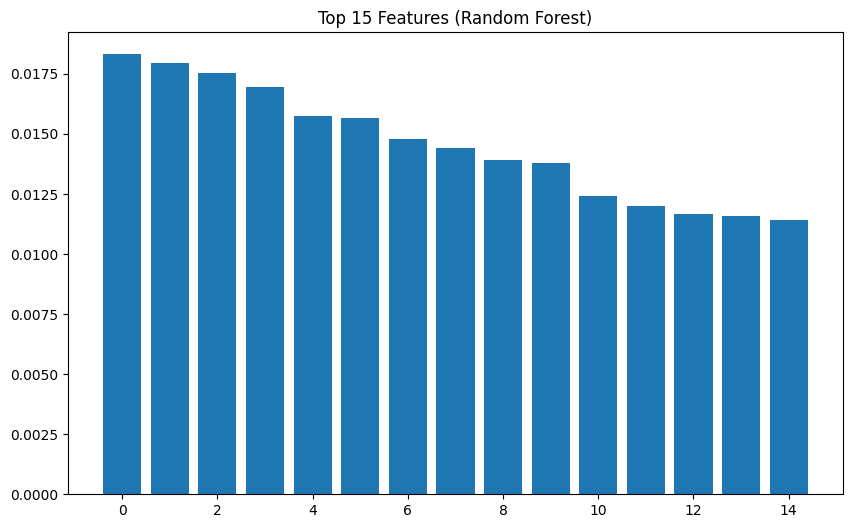

In [39]:
# --- FEATURE IMPORTANCE ---
# Vediamo cosa sta guardando il modello
importances = librosa_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 15

plt.figure(figsize=(10, 6))
plt.title("Top 15 Features (Random Forest)")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), [X_train.columns[i] for i in indices[:top_n]], rotation=45, ha='right')
plt.tight_layout()
plt.show()

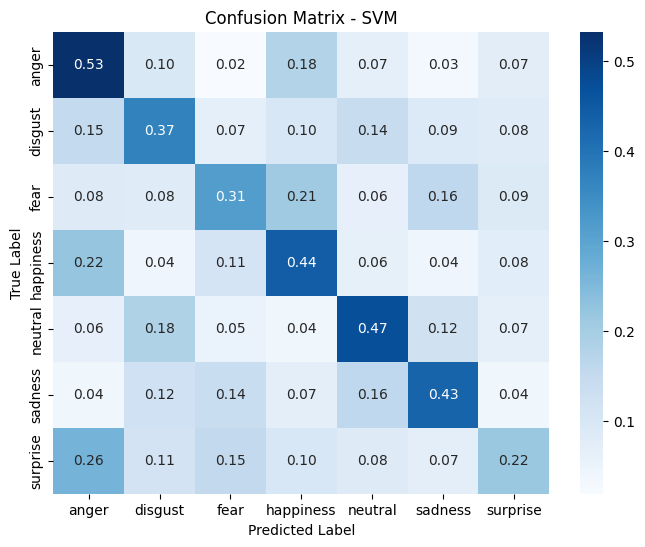

In [40]:
# --- CONFUSION MATRIX (RF) ---
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_dev, y_pred_rf)
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_pct, annot=True, fmt='.2f', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Features of OpenSMILE

{'anger': np.int64(0), 'disgust': np.int64(1), 'fear': np.int64(2), 'happiness': np.int64(3), 'neutral': np.int64(4), 'sadness': np.int64(5), 'surprise': np.int64(6)}

--- Random Forest Results ---
Accuracy: 0.4263
UAR (Macro Recall): 0.4260

Classification Report:

              precision    recall  f1-score   support

       anger       0.39      0.58      0.47       321
     disgust       0.35      0.42      0.38       288
        fear       0.45      0.34      0.39       308
   happiness       0.52      0.42      0.47       316
     neutral       0.45      0.49      0.47       295
     sadness       0.50      0.37      0.42       333
    surprise       0.38      0.35      0.36       297

    accuracy                           0.43      2158
   macro avg       0.43      0.43      0.42      2158
weighted avg       0.44      0.43      0.42      2158



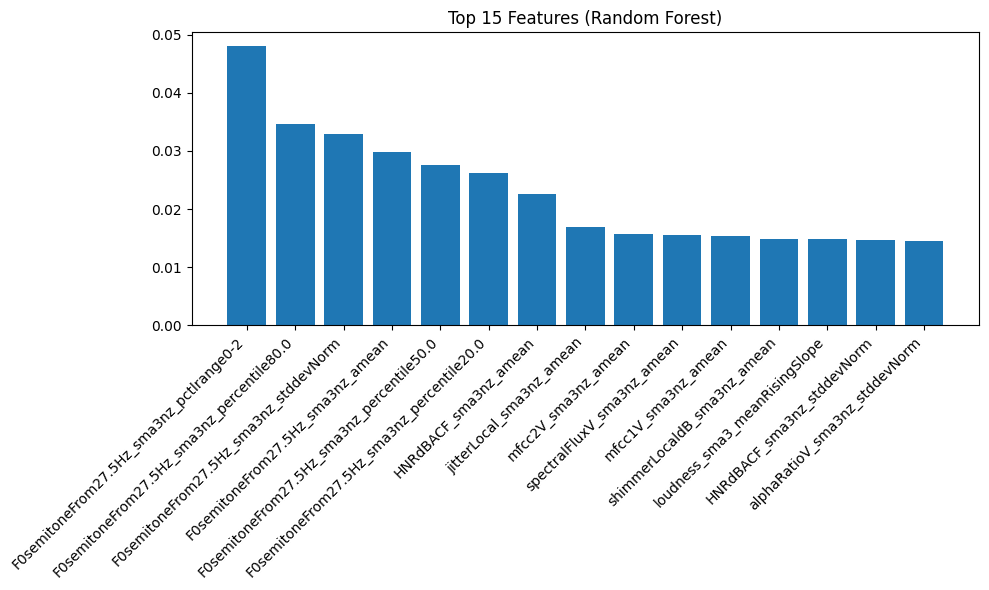

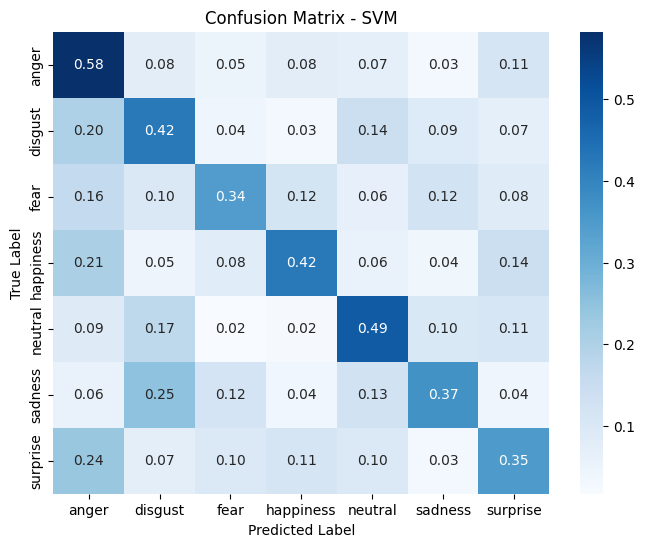

In [41]:
X_train_scaled, y_train, X_dev_scaled, y_dev = build_dfs_for_training(opensmile_df)

opensmile_rf_model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=None,         
    min_samples_split=5,    
    class_weight='balanced',
    random_state=42,
    n_jobs=-1               
)

opensmile_rf_model.fit(X_train_scaled, y_train)
y_pred_rf = opensmile_rf_model.predict(X_dev_scaled)

# UAR (Unweighted Average Recall)
uar_rf = recall_score(y_dev, y_pred_rf, average='macro')
acc_rf = accuracy_score(y_dev, y_pred_rf)

print(f"\n--- Random Forest Results ---")
print(f"Accuracy: {acc_rf:.4f}")
print(f"UAR (Macro Recall): {uar_rf:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_dev, y_pred_rf, target_names=le.classes_))
# --- FEATURE IMPORTANCE ---
# Vediamo cosa sta guardando il modello
importances = opensmile_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 15

plt.figure(figsize=(10, 6))
plt.title("Top 15 Features (Random Forest)")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), [X_train.columns[i] for i in indices[:top_n]], rotation=45, ha='right')
plt.tight_layout()
plt.show()
# --- CONFUSION MATRIX (RF) ---
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_dev, y_pred_rf)
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_pct, annot=True, fmt='.2f', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## SVM

In [42]:
from sklearn.svm import SVC

### Features of Librosa

{'anger': np.int64(0), 'disgust': np.int64(1), 'fear': np.int64(2), 'happiness': np.int64(3), 'neutral': np.int64(4), 'sadness': np.int64(5), 'surprise': np.int64(6)}

--- SVM Results ---
Accuracy: 0.4527
UAR (Macro Recall): 0.4524

Classification Report:

              precision    recall  f1-score   support

       anger       0.45      0.54      0.49       321
     disgust       0.47      0.47      0.47       288
        fear       0.42      0.34      0.37       308
   happiness       0.44      0.48      0.46       316
     neutral       0.46      0.51      0.49       295
     sadness       0.52      0.44      0.48       333
    surprise       0.40      0.39      0.40       297

    accuracy                           0.45      2158
   macro avg       0.45      0.45      0.45      2158
weighted avg       0.45      0.45      0.45      2158



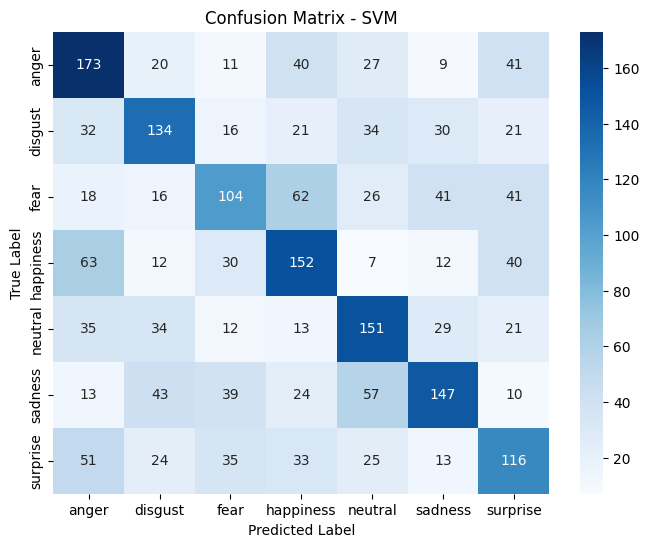

In [43]:
X_train_scaled, y_train, X_dev_scaled, y_dev = build_dfs_for_training(librosa_df)

librosa_svm_model = SVC(
    kernel='rbf', 
    C=1.0,                  
    gamma='scale',          
    class_weight='balanced',
    probability=True,       
    random_state=42
)

librosa_svm_model.fit(X_train_scaled, y_train)

# --- VALUTAZIONE ---
y_pred_svm = librosa_svm_model.predict(X_dev_scaled)

uar_svm = recall_score(y_dev, y_pred_svm, average='macro')
acc_svm = accuracy_score(y_dev, y_pred_svm)

print(f"\n--- SVM Results ---")
print(f"Accuracy: {acc_svm:.4f}")
print(f"UAR (Macro Recall): {uar_svm:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_dev, y_pred_svm, target_names=le.classes_))

# --- CONFUSION MATRIX (SVM) ---
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_dev, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Features of OpenSMILE

{'anger': np.int64(0), 'disgust': np.int64(1), 'fear': np.int64(2), 'happiness': np.int64(3), 'neutral': np.int64(4), 'sadness': np.int64(5), 'surprise': np.int64(6)}

--- SVM Results ---
Accuracy: 0.4606
UAR (Macro Recall): 0.4617

Classification Report:

              precision    recall  f1-score   support

       anger       0.38      0.60      0.47       321
     disgust       0.42      0.50      0.45       288
        fear       0.49      0.41      0.44       308
   happiness       0.57      0.44      0.50       316
     neutral       0.47      0.52      0.49       295
     sadness       0.56      0.34      0.43       333
    surprise       0.45      0.42      0.43       297

    accuracy                           0.46      2158
   macro avg       0.48      0.46      0.46      2158
weighted avg       0.48      0.46      0.46      2158



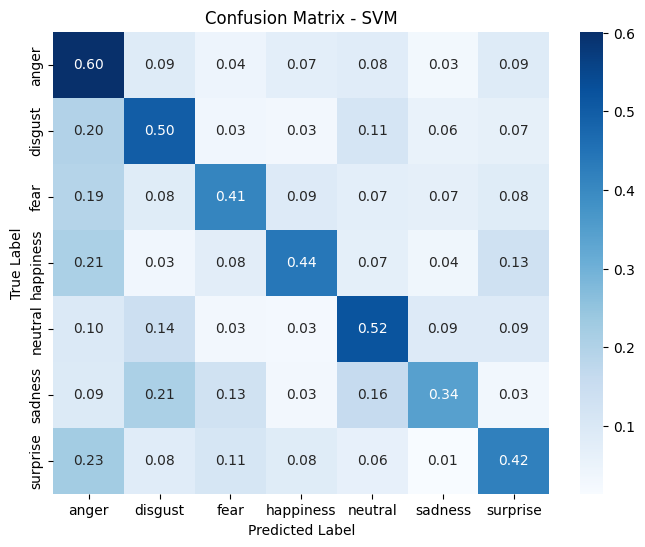

In [44]:
X_train_scaled, y_train, X_dev_scaled, y_dev = build_dfs_for_training(opensmile_df)

opensmile_svm_model = SVC(
    kernel='rbf', 
    C=1.0,                  
    gamma='scale',          
    class_weight='balanced',
    probability=True,       
    random_state=42
)

opensmile_svm_model.fit(X_train_scaled, y_train)

# --- VALUTAZIONE ---
y_pred_svm = opensmile_svm_model.predict(X_dev_scaled)

uar_svm = recall_score(y_dev, y_pred_svm, average='macro')
acc_svm = accuracy_score(y_dev, y_pred_svm)

print(f"\n--- SVM Results ---")
print(f"Accuracy: {acc_svm:.4f}")
print(f"UAR (Macro Recall): {uar_svm:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_dev, y_pred_svm, target_names=le.classes_))

# --- CONFUSION MATRIX (SVM) ---
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_dev, y_pred_svm)
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_pct, annot=True, fmt='.2f', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [45]:
opensmile_norm_df = pd.read_pickle("TRAINING_ML/OPENSMILE_FEATURES_NORM.pkl")
opensmile_norm_df

,file,label,split,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,EMOITA/data/1613671614352.wav,anger,train,38.082653,0.070298,36.122330,39.153728,39.698322,3.575993,13.681193,...,0.043457,0.024475,0.013053,4.697987,2.097902,0.420000,0.143527,0.055000,0.035000,-29.997206
1,EMOITA/data/1613658275427.wav,anger,train,40.416210,0.120092,35.865879,40.851280,43.643463,7.777584,134.605118,...,0.082220,-0.000170,0.249301,4.437870,2.702703,0.203333,0.144760,0.144444,0.229594,-17.485447
2,EMOITA/data/1613324357435.wav,anger,train,36.352093,0.073894,32.938965,37.385406,38.716221,5.777256,36.450661,...,0.039326,0.018660,0.035453,3.888889,2.298851,0.247500,0.218561,0.220000,0.165731,-20.091305
3,EMOITA/data/1614274086698.wav,anger,train,39.521694,0.132925,33.641102,41.257381,44.157024,10.515923,95.706833,...,0.069682,0.005402,0.113051,4.635762,2.702703,0.230000,0.127574,0.186000,0.204900,-22.264414
4,EMOITA/data/1612982146424.wav,anger,train,34.608627,0.200003,30.287437,33.143135,35.956718,5.669281,2856.700928,...,0.036268,0.003279,0.147435,3.319502,1.271186,0.130000,0.141657,0.475000,0.397146,-27.532452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10673,TESS/data/OAF_cab_neutral.wav,neutral,train,33.587734,0.013397,33.257698,33.573410,33.801815,0.544117,11.546522,...,-0.036753,0.025578,0.020441,2.645503,1.092896,0.655000,0.335000,0.240000,0.030000,-37.568298
10674,TESS/data/OAF_chain_disgust.wav,disgust,train,32.935085,0.090005,30.599874,32.400887,35.419796,4.819921,55.039375,...,-0.025782,0.018447,0.033190,2.145923,1.754386,0.330000,0.384773,0.215000,0.127574,-35.905819
10675,TESS/data/OAF_jar_neutral.wav,neutral,train,33.239281,0.018863,32.946789,33.233498,33.606705,0.659916,21.448641,...,-0.043057,0.024206,0.018796,1.960784,1.010101,0.810000,0.370000,0.160000,0.040000,-37.107567
10676,TESS/data/OAF_lot_angry.wav,anger,train,39.684753,0.053821,38.062737,40.380672,41.368752,3.306015,37.567173,...,-0.023124,0.012767,0.059855,2.500000,1.290323,0.585000,0.285000,0.110000,0.028284,-26.319199


{'anger': np.int64(0), 'disgust': np.int64(1), 'fear': np.int64(2), 'happiness': np.int64(3), 'neutral': np.int64(4), 'sadness': np.int64(5), 'surprise': np.int64(6)}

--- SVM Results ---
Accuracy: 0.4606
UAR (Macro Recall): 0.4617

Classification Report:

              precision    recall  f1-score   support

       anger       0.38      0.60      0.47       321
     disgust       0.42      0.50      0.45       288
        fear       0.49      0.41      0.44       308
   happiness       0.57      0.44      0.50       316
     neutral       0.47      0.52      0.49       295
     sadness       0.56      0.34      0.43       333
    surprise       0.45      0.42      0.43       297

    accuracy                           0.46      2158
   macro avg       0.48      0.46      0.46      2158
weighted avg       0.48      0.46      0.46      2158



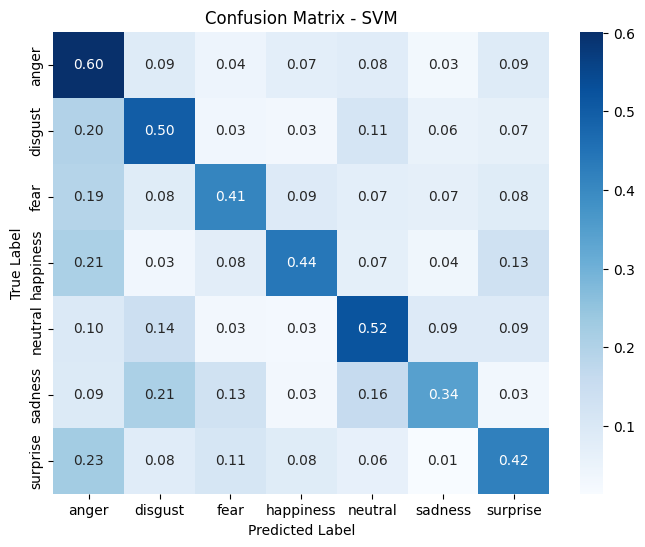

In [46]:
X_train_scaled, y_train, X_dev_scaled, y_dev = build_dfs_for_training(opensmile_norm_df)

opensmile_norm_svm_model = SVC(
    kernel='rbf', 
    C=1.0,                  
    gamma='scale',          
    class_weight='balanced',
    probability=True,       
    random_state=42
)

opensmile_norm_svm_model.fit(X_train_scaled, y_train)

# --- VALUTAZIONE ---
y_pred_svm = opensmile_norm_svm_model.predict(X_dev_scaled)

uar_svm = recall_score(y_dev, y_pred_svm, average='macro')
acc_svm = accuracy_score(y_dev, y_pred_svm)

print(f"\n--- SVM Results ---")
print(f"Accuracy: {acc_svm:.4f}")
print(f"UAR (Macro Recall): {uar_svm:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_dev, y_pred_svm, target_names=le.classes_))

# --- CONFUSION MATRIX (SVM) ---
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_dev, y_pred_svm)
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_pct, annot=True, fmt='.2f', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## FINE-TUNING

- OpenSMILE features without peak or LUFS normalization
- SVM

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, recall_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [48]:
df = pd.read_pickle("TRAINING_ML/OPENSMILE_FEATURES.pkl")
df

,file,label,split,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,EMOITA/data/1613671614352.wav,anger,train,38.082653,0.070298,36.122330,39.153728,39.698322,3.575993,13.681193,...,0.043457,0.024475,0.013053,4.697987,2.097902,0.420000,0.143527,0.055000,0.035000,-29.997206
1,EMOITA/data/1613658275427.wav,anger,train,40.416210,0.120092,35.865879,40.851280,43.643463,7.777584,134.605118,...,0.082220,-0.000170,0.249301,4.437870,2.702703,0.203333,0.144760,0.144444,0.229594,-17.485447
2,EMOITA/data/1613324357435.wav,anger,train,36.352093,0.073894,32.938965,37.385406,38.716221,5.777256,36.450661,...,0.039326,0.018660,0.035453,3.888889,2.298851,0.247500,0.218561,0.220000,0.165731,-20.091305
3,EMOITA/data/1614274086698.wav,anger,train,39.521694,0.132925,33.641102,41.257381,44.157024,10.515923,95.706833,...,0.069682,0.005402,0.113051,4.635762,2.702703,0.230000,0.127574,0.186000,0.204900,-22.264414
4,EMOITA/data/1612982146424.wav,anger,train,34.608627,0.200003,30.287437,33.143135,35.956718,5.669281,2856.700928,...,0.036268,0.003279,0.147435,3.319502,1.271186,0.130000,0.141657,0.475000,0.397146,-27.532452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10673,TESS/data/OAF_cab_neutral.wav,neutral,train,33.587734,0.013397,33.257698,33.573410,33.801815,0.544117,11.546522,...,-0.036753,0.025578,0.020441,2.645503,1.092896,0.655000,0.335000,0.240000,0.030000,-37.568298
10674,TESS/data/OAF_chain_disgust.wav,disgust,train,32.935085,0.090005,30.599874,32.400887,35.419796,4.819921,55.039375,...,-0.025782,0.018447,0.033190,2.145923,1.754386,0.330000,0.384773,0.215000,0.127574,-35.905819
10675,TESS/data/OAF_jar_neutral.wav,neutral,train,33.239281,0.018863,32.946789,33.233498,33.606705,0.659916,21.448641,...,-0.043057,0.024206,0.018796,1.960784,1.010101,0.810000,0.370000,0.160000,0.040000,-37.107567
10676,TESS/data/OAF_lot_angry.wav,anger,train,39.684753,0.053821,38.062737,40.380672,41.368752,3.306015,37.567173,...,-0.023124,0.012767,0.059855,2.500000,1.290323,0.585000,0.285000,0.110000,0.028284,-26.319199


In [49]:
le = LabelEncoder()
scaler = StandardScaler()

def build_dfs_for_training(df, label_encoder = le, standard_scaler = scaler):
    
    try:

        df["label_encoded"] = le.fit_transform(df["label"])

        label_map = dict(zip(le.classes_, le.transform(le.classes_)))
        print(label_map)
        
        train_data = df[df.split == "train"]
        X_train = train_data.drop(columns = ["file", "label", "label_encoded", "split"])
        y_train = train_data.label_encoded
        
        dev_data = df[df.split == "dev"]
        X_dev = dev_data.drop(columns = ["file", "label", "label_encoded", "split"])
        y_dev = dev_data.label_encoded
        
        X_train_scaled = scaler.fit_transform(X_train)
        X_dev_scaled = scaler.transform(X_dev)          #using ONLY trasform because we fit the scaler only on training set to avoid data leakage

        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
        X_dev_scaled = pd.DataFrame(X_dev_scaled, columns=X_dev.columns)
        
        X_train_scaled, y_train = shuffle(X_train_scaled, y_train, random_state=4226)
        
        return X_train_scaled, y_train, X_dev_scaled, y_dev
    
    except Exception as e:
        print(f"{e}")
        return None
    

X_train_scaled, y_train, X_dev_scaled, y_dev = build_dfs_for_training(df)   

{'anger': np.int64(0), 'disgust': np.int64(1), 'fear': np.int64(2), 'happiness': np.int64(3), 'neutral': np.int64(4), 'sadness': np.int64(5), 'surprise': np.int64(6)}


In [53]:
param_grid = [
    {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
    'class_weight': ['balanced']
},
    {
    'kernel': ['poly'],
    'degree': [2, 3],
    'C': [1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
    'class_weight': ['balanced']
}    
]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    SVC(),
    param_grid,
    refit=True,             
    verbose=2,              
    cv=cv,
    scoring='recall_macro', 
    n_jobs=-1               
)

Fitting 5 folds for each of 65 candidates, totalling 325 fits
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.0s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, gamma=0

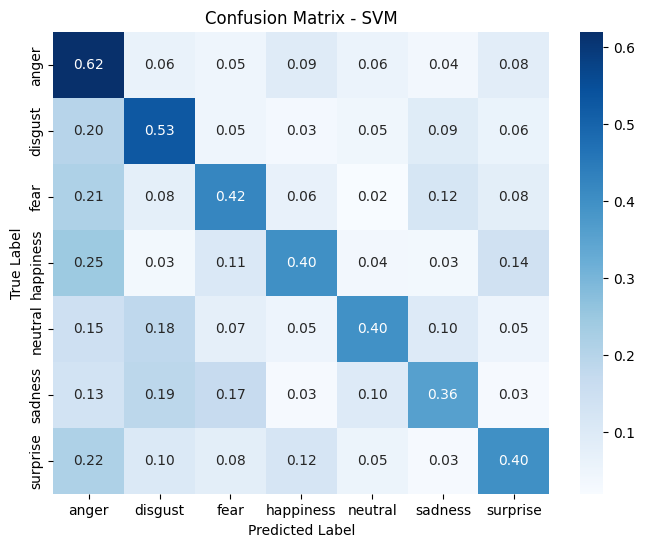

In [54]:
# --- 4. ESECUZIONE (Solo sul TRAINING set) ---
grid.fit(X_train_scaled, y_train)

# --- 5. RISULTATI ---
print(f"\n Best parameters: {grid.best_params_}")
print(f"Best Score (Cross-Val UAR): {grid.best_score_:.4f}")

# --- 6. VALIDAZIONE FINALE SU DEV SET ---
print("\n--- Optimal model's Validation on DEV SET ---")
best_model = grid.best_estimator_
y_pred_opt = best_model.predict(X_dev_scaled)

uar_opt = recall_score(y_dev, y_pred_opt, average='macro')
print(f"Final UAR (Dev Set): {uar_opt:.4f}")
print(classification_report(y_dev, y_pred_opt, target_names=le.classes_))

# ---- CONFUSION MATRIX ---- #
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_dev, y_pred_opt)
cm_pct = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_pct, annot=True, fmt='.2f', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Saving Model

In [57]:
import joblib
import os

In [56]:
BEST_MODEL = {
    'model'      : grid.best_estimator_, 
    'scaler'     : scaler,
    'label_enc'  : le,
    'feature_set': 'OpenSMILE_eGeMAPSv02'
}

In [59]:
model_path = os.path.join("TRAINING_ML", "SVM_OpenSMILE.pkl")

if os.path.exists(model_path):
    print("Model already saved.")
else:
    print(f"{os.path.basename(model_path)} saved correctly.")
    joblib.dump(BEST_MODEL, model_path)

SVM_OpenSMILE.pkl saved correctly.
